<a href="https://colab.research.google.com/github/Lukman289/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Modul_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [2]:
def convolution2d(image, kernel, stride, padding):
    # Tambahkan padding di sekitar gambar
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Dapatkan ukuran gambar dan kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Hitung ukuran output
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    # Inisialisasi hasil output dengan nilai nol
    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Lakukan convolution
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Tentukan region dari input yang akan dikonvolusi
            region = image[y*stride : y*stride + kernel_height, x*stride : x*stride + kernel_width]

            # Hitung nilai hasil convolution (perkalian elemen dan penjumlahan)
            output[y, x] = np.sum(region * kernel)

    return output

In [3]:
img = cv.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

In [5]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

In [6]:
kernel_sobel = np.array([[1,0,-1],
                         [1,0,-2],
                         [1,0,-1]])

In [7]:
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

In [8]:
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

In [9]:
kernel_gaussian = (1 / 256) * np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
])

In [10]:
# Tentukan ukuran kernel (harus ganjil) dan nilai sigma
kernel_size = 21
sigma = math.sqrt(kernel_size)  # Estimasi nilai sigma

# Buat kernel Gaussian 1D
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

# Buat kernel Gaussian 2D dengan perkalian outer product
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

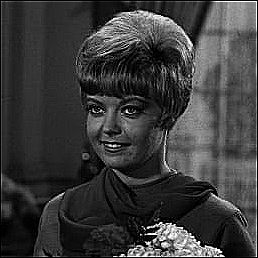

In [11]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_sharpen, 1, 2)

cv2_imshow(output)

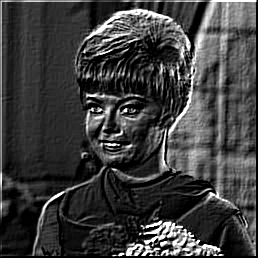

In [12]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_emboss, 1, 2)

cv2_imshow(output)

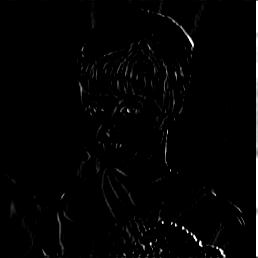

In [13]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_sobel, 1, 2)

cv2_imshow(output)

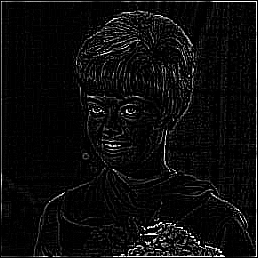

In [14]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_canny, 1, 2)

cv2_imshow(output)

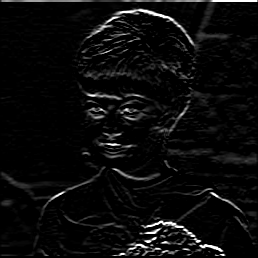

In [15]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_prewitt, 1, 2)

cv2_imshow(output)

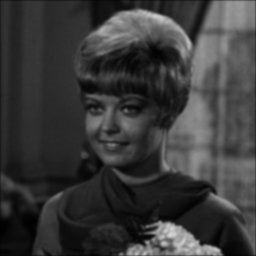

In [16]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, kernel_gaussian, 1, 2)

cv2_imshow(output)

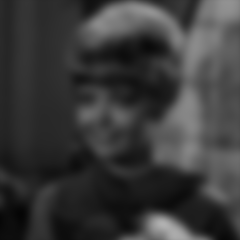

In [17]:
# Terapkan convolution dengan stride 1 dan padding 1
output = convolution2d(img_gray, gaussian_kernel_2d, 1, 2)

cv2_imshow(output)